In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

Ładowanie danych

In [2]:
import matplotlib.pyplot as plt
data_load = datasets.load_iris()

In [3]:
df = pd.DataFrame(data_load.data, columns=data_load.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Wizualizacja danych

In [4]:
df['target'] = pd.DataFrame(data_load['target'], columns = ['target'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
x = pd.DataFrame(data_load['data'], columns = data_load['feature_names'])
y =  data_load.target

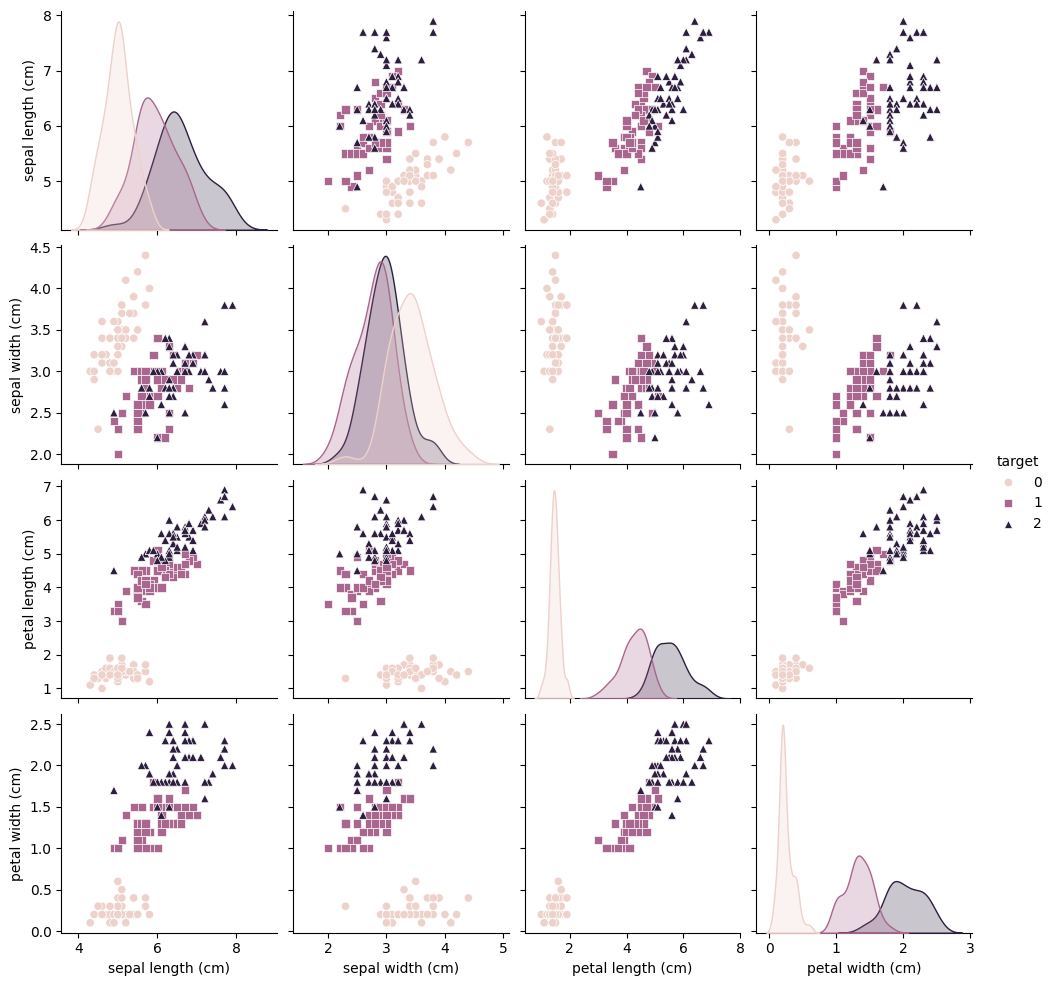

In [6]:
sns.pairplot(df, hue='target', markers=["o", "s", "^"])
plt.show()


Sprawdź który z podziałów jest lepszy w przypadku miary entropii

Funkcja obliczająca wartość entropii

In [7]:
def oblicz_entropie(prawdopodobienstwo):
    return -np.sum(prawdopodobienstwo * np.log2(prawdopodobienstwo + np.finfo(float).eps))

In [9]:
def zysk_informacyjny(df, kolumna_podzialu, wartosc_podzialu):
    liczby = np.bincount(df['target'])
    prawdopodobienstwa = liczby / len(df['target'])
    pierwotna_entropia = oblicz_entropie(prawdopodobienstwa)

    lewy_podzial = df[df[kolumna_podzialu] <= wartosc_podzialu]
    prawy_podzial = df[df[kolumna_podzialu] > wartosc_podzialu]

    liczby_lewa = np.bincount(lewy_podzial['target'])
    prawdopodobienstwa_lewa = liczby_lewa / len(lewy_podzial['target'])
    lewa_entropia = oblicz_entropie(prawdopodobienstwa_lewa)

    liczby_prawa = np.bincount(prawy_podzial['target'])
    prawdopodobienstwa_prawa = liczby_prawa / len(prawy_podzial['target'])
    prawa_entropia = oblicz_entropie(prawdopodobienstwa_prawa)

    n = len(df)
    n_lewa = len(lewy_podzial)
    n_prawa = len(prawy_podzial)
    wazona_entropia = (n_lewa/n) * lewa_entropia + (n_prawa/n) * prawa_entropia

    zysk_info = pierwotna_entropia - wazona_entropia
    return zysk_info

# Obliczanie zysku informacyjnego dla petal width (cm) przy 0.5 i 0.38
zysk_info_0_5 = zysk_informacyjny(df, 'petal width (cm)', 0.5)
zysk_info_0_38 = zysk_informacyjny(df, 'petal width (cm)', 0.38)

print(f"Zysk informacyjny dla podziału przy 0.5: {zysk_info_0_5}")
print(f"Zysk informacyjny dla podziału przy 0.38: {zysk_info_0_38}")

Zysk informacyjny dla podziału przy 0.5: 0.8643375621847639
Zysk informacyjny dla podziału przy 0.38: 0.6195148513196114


Zaimplementuj drzewo decyzyjne i las losowy (złożony z 15 drzew); przetestuj na 30% zbiorze testowym

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [11]:
drzewo = DecisionTreeClassifier(random_state=42)
drzewo.fit(X_train, y_train)
y_pred_drzewo = drzewo.predict(X_test)
dokladnosc_drzewo = accuracy_score(y_test, y_pred_drzewo)

# Implementacja lasu losowego (z 15 drzewami)
las = RandomForestClassifier(n_estimators=15, random_state=42)
las.fit(X_train, y_train)
y_pred_las = las.predict(X_test)
dokladnosc_las = accuracy_score(y_test, y_pred_las)

print(f"Dokładność drzewa decyzyjnego: {dokladnosc_drzewo:.4f}")
print(f"Dokładność lasu losowego (15 drzew): {dokladnosc_las:.4f}")

Dokładność drzewa decyzyjnego: 1.0000
Dokładność lasu losowego (15 drzew): 1.0000


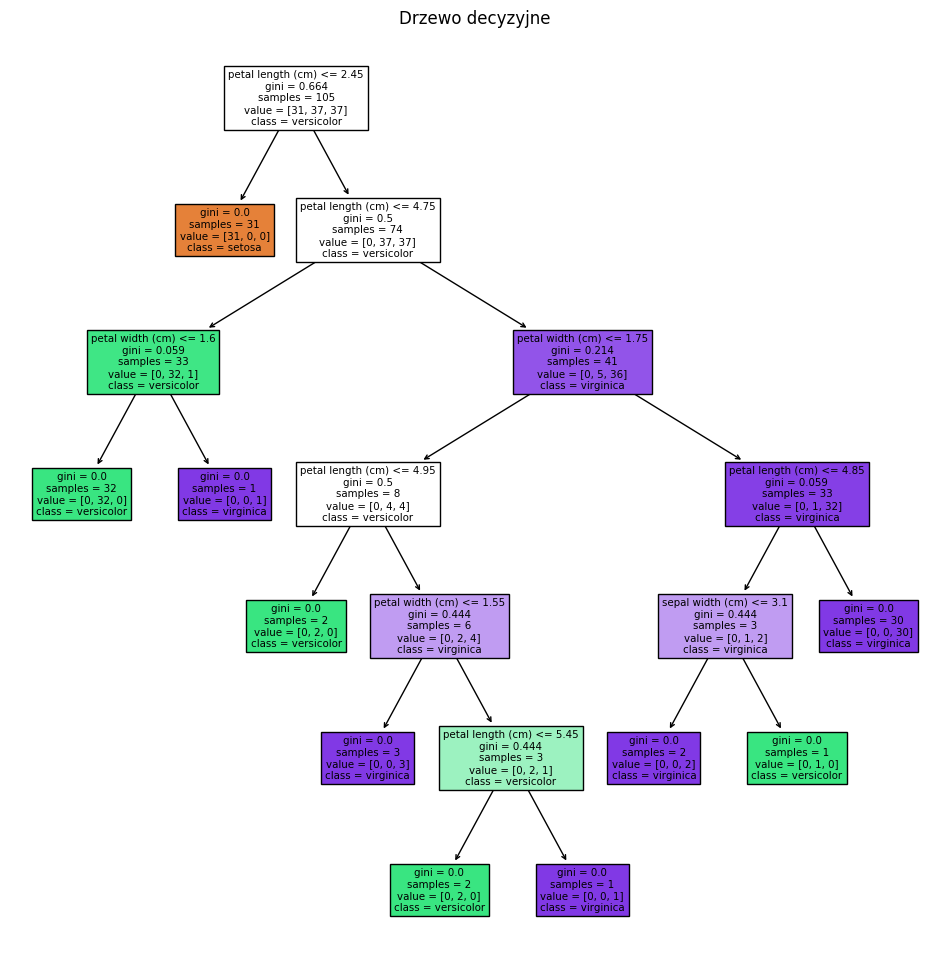

In [12]:
plt.figure(figsize=(12, 12))
plot_tree(drzewo, filled=True, feature_names=data_load.feature_names, class_names=data_load.target_names)
plt.title("Drzewo decyzyjne")
plt.show()